In [1]:
import git
repo = git.Repo('.', search_parent_directories=True)
repo_loc = repo.working_tree_dir

import os
import sys
from pathlib import Path

sys.path.append(repo_loc)

import numpy as np
import pandas as pd

# Import custom functions
# from covid19_prob_func import severe_prob_update, icu_or_vent_prob_update, update_prob, death_num_update
from src.covid19_plot_func import plot_death_icu_rate
from src.covid19_model import run_model, run_multiple
from src import conf_helper as cf
from src.covid19_region_attr import create_region
from src import covid19_plot_func

In [2]:
model_config_file = 'model_param_v1.yaml'
model_config = cf.CovidConf(project_dir=repo_loc, config_file=model_config_file)

In [3]:
# Choose a region object to run the model with
region_config = 'bavaria_20200416.yaml' # 'lombardy_20200417.yaml', 'nsw_20200425.yaml', 'wuhan_20200412.yaml']
r = create_region(region_config)

In [4]:
# Assuming 500 infected per 100K people in total
n_infected_per_100k = 500

n_total_infect = int(n_infected_per_100k/100000*r.get_total_pop())

list_day_div = [200, 100, 50, 20, 10]

n_base_test_case = int(r.t_icu_est/10)

run_days = 90

t_hosp_bed = 2000
t_icu = [r.t_icu_est*20] # Maximise ICU beds to see the complete trends
t_vent = t_icu

list_fix_total_diff_days_df_infected = []
fix_total_diff_days_text = []

# Run model

In [5]:
for div in list_day_div:
    constant_daily_case = np.round(n_total_infect/div)
    daily_case = [constant_daily_case]*div # constant daily cases for 30 days
    
    fix_total_diff_days_text.append(f'{"%.0f" % constant_daily_case} ({"%.2f" % ((constant_daily_case/r.get_total_pop())*100000)} per 100K) per day for {div} days')
        
    list_df_infected, list_df_death_cause = run_multiple(daily_case, r.pop_ratio, run_days, t_hosp_bed, t_icu, t_vent, model_config)
    
    list_fix_total_diff_days_df_infected.append(list_df_infected[0])

# The last div run should be the most serious one, so can get the max ICU number reached
icu_case_max = (list_df_infected[0]['Total']['ICU'].max() + list_df_infected[0]['Total']['ICU + ventilator'].max())

t_icu:  88200
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70...
Running model for Day 80...
Finished running model for t_icu value of 88200

t_icu:  88200
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70...
Running model for Day 80...
Finished running model for t_icu value of 88200

t_icu:  88200
Running model for Day 0...
Running model for Day 10...
Running model for Day 20...
Running model for Day 30...
Running model for Day 40...
Running model for Day 50...
Running model for Day 60...
Running model for Day 70...
Running model for Day 80...
Finished running model for t_icu value of 88200

t_icu:  88200
Running model for Day 0...
Running model for

# Plotting

1


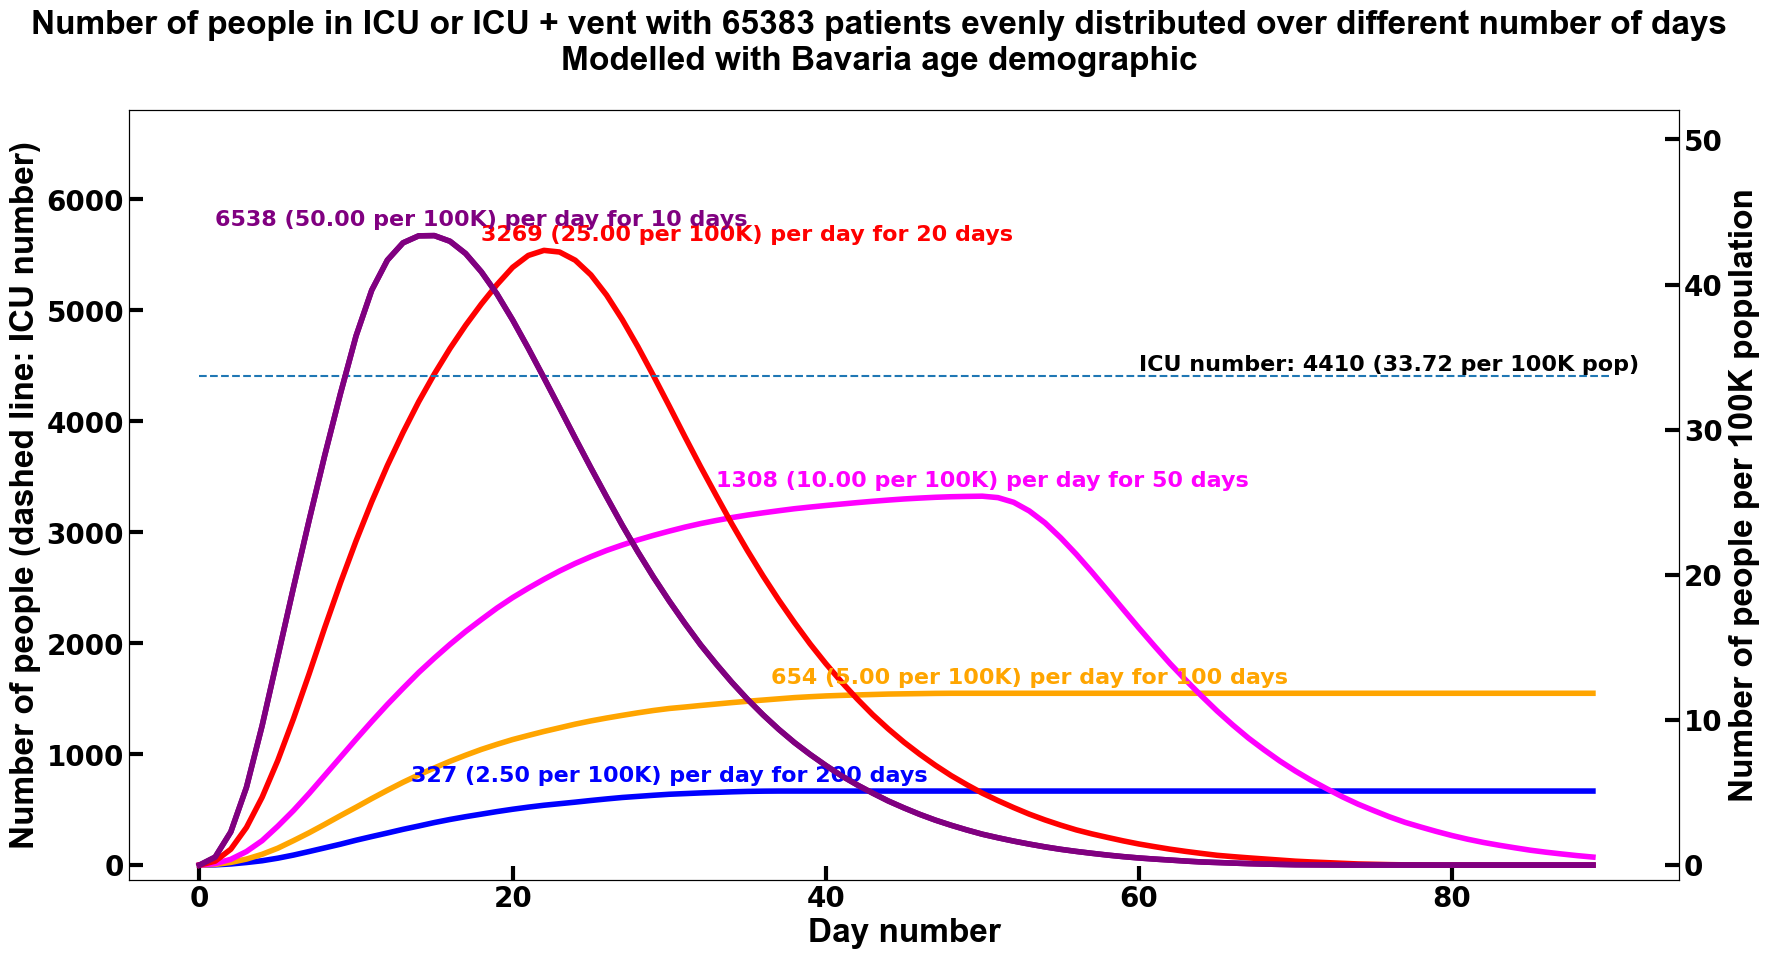

In [6]:
covid19_plot_func.plot_fix_case_diff_days(r, list_fix_total_diff_days_df_infected, fix_total_diff_days_text, icu_case_max, n_total_infect)